<a href="https://colab.research.google.com/github/ArthAgrawal/Brain-Tumor-Research-Paper/blob/main/Atrous_Convolution_VGG16_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd

dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_Albumented_Balanced_Final2'

img_height, img_width = 224, 224  # Size required by VGG16
batch_size = 32

def get_image_paths_and_labels(base_path):
    labels = []
    paths = []
    class_names = sorted(os.listdir(base_path))

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(base_path, class_name)
        for img_name in os.listdir(class_folder):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_folder, img_name)
                paths.append(img_path)
                labels.append(label)

    return paths, labels, class_names

image_paths, labels, class_names = get_image_paths_and_labels(dataset_folder_path)

labels = np.array(labels)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

train_df = pd.DataFrame({'filename': X_train, 'class': y_train})
val_df = pd.DataFrame({'filename': X_val, 'class': y_val})
test_df = pd.DataFrame({'filename': X_test, 'class': y_test})

train_df['class'] = train_df['class'].apply(lambda x: class_names[x])
val_df['class'] = val_df['class'].apply(lambda x: class_names[x])
test_df['class'] = test_df['class'].apply(lambda x: class_names[x])

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

print(f"Class names: {class_names}")


Found 3840 validated image filenames belonging to 15 classes.
Found 960 validated image filenames belonging to 15 classes.
Found 1200 validated image filenames belonging to 15 classes.
Class names: ['Astrocitoma T1_augmented', 'Carcinoma T1_augmented', 'Ependimoma T1_augmented', 'Ganglioglioma T1_augmented', 'Germinoma T1_augmented', 'Glioblastoma T1_augmented', 'Granuloma T1_augmented', 'Meduloblastoma T1_augmented', 'Meningioma T1_augmented', 'Neurocitoma T1_augmented', 'Oligodendroglioma T1_augmented', 'Papiloma T1_augmented', 'Schwannoma T1_augmented', 'Tuberculoma T1_augmented', '_NORMAL T1_augmented']


In [5]:
from collections import Counter

def check_split_distribution(labels):
    return Counter(labels)

train_dist = check_split_distribution(y_train)
val_dist = check_split_distribution(y_val)
test_dist = check_split_distribution(y_test)

print("Class distribution in the training set:")
for class_index, count in train_dist.items():
    print(f"Class {class_index}: {count} images")

print("\nClass distribution in the validation set:")
for class_index, count in val_dist.items():
    print(f"Class {class_index}: {count} images")

print("\nClass distribution in the test set:")
for class_index, count in test_dist.items():
    print(f"Class {class_index}: {count} images")


Class distribution in the training set:
Class 3: 256 images
Class 9: 256 images
Class 13: 256 images
Class 1: 256 images
Class 10: 256 images
Class 8: 256 images
Class 11: 256 images
Class 12: 256 images
Class 2: 256 images
Class 4: 256 images
Class 0: 256 images
Class 14: 256 images
Class 7: 256 images
Class 5: 256 images
Class 6: 256 images

Class distribution in the validation set:
Class 9: 64 images
Class 13: 64 images
Class 4: 64 images
Class 11: 64 images
Class 2: 64 images
Class 14: 64 images
Class 6: 64 images
Class 5: 64 images
Class 10: 64 images
Class 3: 64 images
Class 8: 64 images
Class 7: 64 images
Class 12: 64 images
Class 0: 64 images
Class 1: 64 images

Class distribution in the test set:
Class 1: 80 images
Class 10: 80 images
Class 6: 80 images
Class 9: 80 images
Class 11: 80 images
Class 2: 80 images
Class 12: 80 images
Class 3: 80 images
Class 13: 80 images
Class 8: 80 images
Class 5: 80 images
Class 4: 80 images
Class 14: 80 images
Class 7: 80 images
Class 0: 80 im

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Oct  6 19:32:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


In [8]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Best hyperparameters found
best_layers = [512, 256, 128]
best_batch_size = 64
best_learning_rate = 0.001

def create_vgg16_with_atrous():
    input_layer = Input(shape=(224, 224, 3))

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 3 with Atrous Convolution
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 4 with Atrous Convolution
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), dilation_rate=(3, 3), padding='same', activation='relu')(x)  # Atrous convolution
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), dilation_rate=(2, 2), padding='same', activation='relu')(x)  # Atrous convolution
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)

    for nodes in best_layers:
        x = Dense(nodes, activation='relu')(x)
        x = BatchNormalization()(x)

    predictions = Dense(15, activation='softmax', dtype='float32')(x)

    model = Model(inputs=input_layer, outputs=predictions)

    for layer in model.layers[:-1]:
        if isinstance(layer, Conv2D):
            layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_vgg16_with_atrous()

model.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

start_time = time.time()
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=best_batch_size,
    callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()

training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,729,999 (105.78 MB)

 Trainable params: 13,013,519 (49.64 MB)

 Non-trainable params: 14,716,480 (56.14 MB)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 3889s 31s/step - accuracy: 0.3677 - loss: 2.1327 - val_accuracy: 0.0740 - val_loss: 2.7269 - learning_rate: 0.0010
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - accuracy: 0.6930 - loss: 1.0722 - val_accuracy: 0.0979 - val_loss: 2.6549 - learning_rate: 0.0010
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 23s 183ms/step - accuracy: 0.7987 - loss: 0.6859 - val_accuracy: 0.1104 - val_loss: 2.5196 - learning_rate: 0.0010
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.8247 - loss: 0.6029 - val_accuracy: 0.2365 - val_loss: 2.5745 - learning_rate: 0.0010
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step - accuracy: 0.8668 - loss: 0.4516 - val_accuracy: 0.3292 - val_loss: 3.8276 - learning_rate: 0.0010
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.8514 - loss: 0.4911 - val_accuracy: 0.1594 - val_loss: 5.0438 - learning_rate: 0.0010
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.8812 - loss:

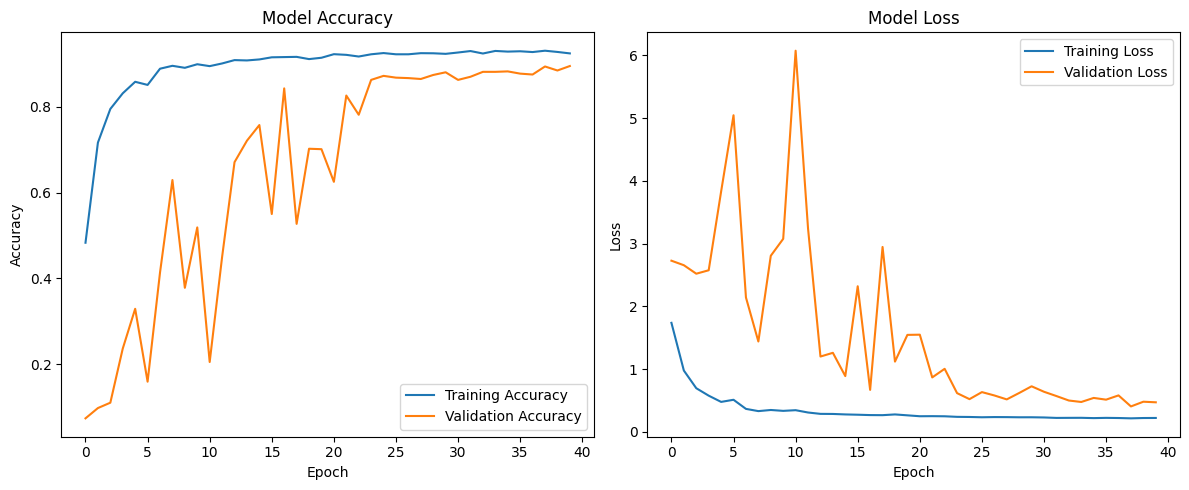

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 911s 25s/step - accuracy: 0.8966 - loss: 0.3837
Test Accuracy: 0.8858


In [13]:
from google.colab import drive
import os

drive.mount('/content/drive')

model_dir = '/content/drive/MyDrive/brain_tumor_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_name = 'Atrous_Convolution_v2.h5'

model.save(os.path.join(model_dir, model_name))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


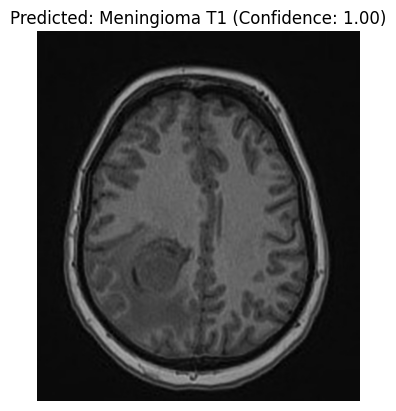

In [14]:

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path, target_size=(224, 224)):

    img = load_img(image_path, target_size=target_size)
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match model input (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (VGG16 specific)
    img_array = img_array / 255.0  # Normalizing the image
    return img_array

def predict_image(image_path, model, class_names):
    img_array = load_and_preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_prob = np.max(predictions)
    return class_names[predicted_class[0]], predicted_prob

def display_prediction(image_path, predicted_class, predicted_prob):
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} (Confidence: {predicted_prob:.2f})")
    plt.show()

image_path = '/content/drive/MyDrive/Brain_Tumor_44/Meningioma T1/0e7717a596ec7797ebea9a74c282960e67237f41ed71dd6528f4add050bb225d_big_gallery.jpeg'
class_names = ['Astrocitoma T1', 'Carcinoma T1', 'Ependimoma T1', 'Ganglioglioma T1', 'Germinoma T1',
               'Glioblastoma T1', 'Granuloma T1', 'Meduloblastoma T1', 'Meningioma T1', 'Neurocitoma T1',
               'Oligodendroglioma T1', 'Papiloma T1', 'Schwannoma T1', 'Tuberculoma T1', '_NORMAL T1']

predicted_class, predicted_prob = predict_image(image_path, model, class_names)
display_prediction(image_path, predicted_class, predicted_prob)

In [15]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Best hyperparameters found
best_layers = [512, 256, 128]
best_batch_size = 64
best_learning_rate = 0.001

def create_vgg16_with_atrous():
    input_layer = Input(shape=(224, 224, 3))

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 3 with Atrous Convolution
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 4 with Atrous Convolution
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), dilation_rate=(3, 3), padding='same', activation='relu')(x)  # Atrous convolution
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)

    for nodes in best_layers:
        x = Dense(nodes, activation='relu')(x)
        x = BatchNormalization()(x)

    predictions = Dense(15, activation='softmax', dtype='float32')(x)

    model2 = Model(inputs=input_layer, outputs=predictions)

    for layer in model2.layers[:-1]:
        if isinstance(layer, Conv2D):
            layer.trainable = False

    model2.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model2

model2 = create_vgg16_with_atrous()

model2.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

start_time = time.time()
history = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=best_batch_size,
    callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()

training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,729,999 (105.78 MB)

 Trainable params: 13,013,519 (49.64 MB)

 Non-trainable params: 14,716,480 (56.14 MB)

Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 29s 193ms/step - accuracy: 0.3688 - loss: 2.1291 - val_accuracy: 0.0771 - val_loss: 2.7444 - learning_rate: 0.0010
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.6906 - loss: 1.0566 - val_accuracy: 0.1417 - val_loss: 2.7097 - learning_rate: 0.0010
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - accuracy: 0.7880 - loss: 0.7222 - val_accuracy: 0.2635 - val_loss: 2.5044 - learning_rate: 0.0010
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - accuracy: 0.8393 - loss: 0.5624 - val_accuracy: 0.4927 - val_loss: 1.9270 - learning_rate: 0.0010
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.8689 - loss: 0.4678 - val_accuracy: 0.2562 - val_loss: 3.3218 - learning_rate: 0.0010
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.8668 - loss: 0.4515 - val_accuracy: 0.5135 - val_loss: 2.6053 - learning_rate: 0.0010
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - accuracy: 0.8

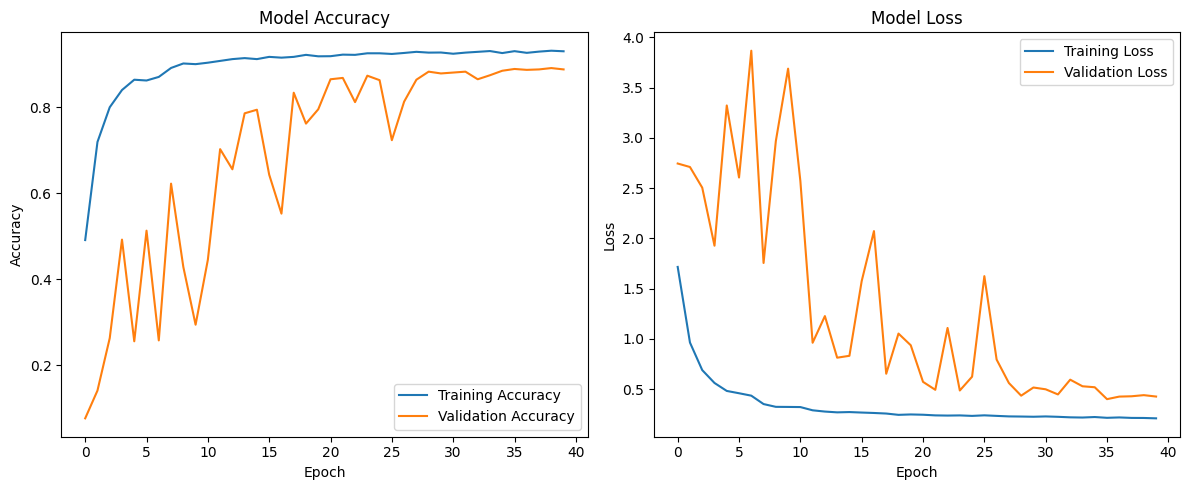

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [17]:
test_loss, test_acc = model2.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.9133 - loss: 0.3362
Test Accuracy: 0.9008


In [18]:
from google.colab import drive
import os

drive.mount('/content/drive')

model_dir = '/content/drive/MyDrive/brain_tumor_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_name = 'Atrous_Convolution_v3.h5'

model2.save(os.path.join(model_dir, model_name))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step


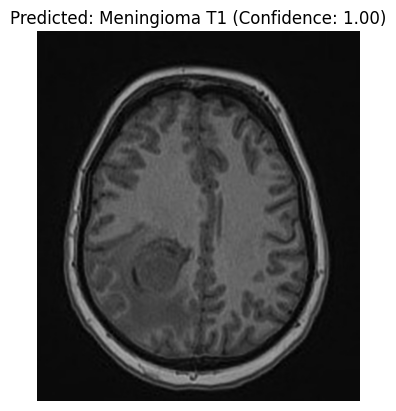

In [19]:

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path, target_size=(224, 224)):

    img = load_img(image_path, target_size=target_size)
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match model input (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (VGG16 specific)
    img_array = img_array / 255.0  # Normalizing the image
    return img_array

def predict_image(image_path, model, class_names):
    img_array = load_and_preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_prob = np.max(predictions)
    return class_names[predicted_class[0]], predicted_prob

def display_prediction(image_path, predicted_class, predicted_prob):
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} (Confidence: {predicted_prob:.2f})")
    plt.show()

image_path = '/content/drive/MyDrive/Brain_Tumor_44/Meningioma T1/0e7717a596ec7797ebea9a74c282960e67237f41ed71dd6528f4add050bb225d_big_gallery.jpeg'
class_names = ['Astrocitoma T1', 'Carcinoma T1', 'Ependimoma T1', 'Ganglioglioma T1', 'Germinoma T1',
               'Glioblastoma T1', 'Granuloma T1', 'Meduloblastoma T1', 'Meningioma T1', 'Neurocitoma T1',
               'Oligodendroglioma T1', 'Papiloma T1', 'Schwannoma T1', 'Tuberculoma T1', '_NORMAL T1']

predicted_class, predicted_prob = predict_image(image_path, model2, class_names)
display_prediction(image_path, predicted_class, predicted_prob)

In [20]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Best hyperparameters found
best_layers = [512, 256, 128]
best_batch_size = 64
best_learning_rate = 0.001

def create_vgg16_with_atrous():
    input_layer = Input(shape=(224, 224, 3))

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 3 with Atrous Convolution
    x = Conv2D(512, (3, 3), dilation_rate=(2, 2), padding='same', activation='relu')(x)  # Atrous convolution
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 4 with Atrous Convolution
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), dilation_rate=(3, 3), padding='same', activation='relu')(x)  # Atrous convolution
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), dilation_rate=(3, 3), padding='same', activation='relu')(x)  # Atrous convolution
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)

    for nodes in best_layers:
        x = Dense(nodes, activation='relu')(x)
        x = BatchNormalization()(x)

    predictions = Dense(15, activation='softmax', dtype='float32')(x)

    model3 = Model(inputs=input_layer, outputs=predictions)

    for layer in model3.layers[:-1]:
        if isinstance(layer, Conv2D):
            layer.trainable = False

    model3.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model3

model3 = create_vgg16_with_atrous()

model3.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

start_time = time.time()
history = model3.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=best_batch_size,
    callbacks=[early_stopping, reduce_lr]
)
end_time = time.time()

training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 56, 56, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 56, 56, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,614,991 (109.16 MB)

 Trainable params: 13,013,519 (49.64 MB)

 Non-trainable params: 15,601,472 (59.51 MB)

Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 235ms/step - accuracy: 0.3784 - loss: 2.1439 - val_accuracy: 0.0677 - val_loss: 2.7698 - learning_rate: 0.0010
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 209ms/step - accuracy: 0.6898 - loss: 1.0722 - val_accuracy: 0.0677 - val_loss: 2.7708 - learning_rate: 0.0010
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.7862 - loss: 0.7139 - val_accuracy: 0.2094 - val_loss: 2.5523 - learning_rate: 0.0010
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 0.8351 - loss: 0.5670 - val_accuracy: 0.2740 - val_loss: 2.5736 - learning_rate: 0.0010
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 213ms/step - accuracy: 0.8546 - loss: 0.5010 - val_accuracy: 0.1708 - val_loss: 4.8728 - learning_rate: 0.0010
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 212ms/step - accuracy: 0.8635 - loss: 0.4696 - val_accuracy: 0.4479 - val_loss: 2.5703 - learning_rate: 0.0010
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 212ms/step - accuracy: 0.8

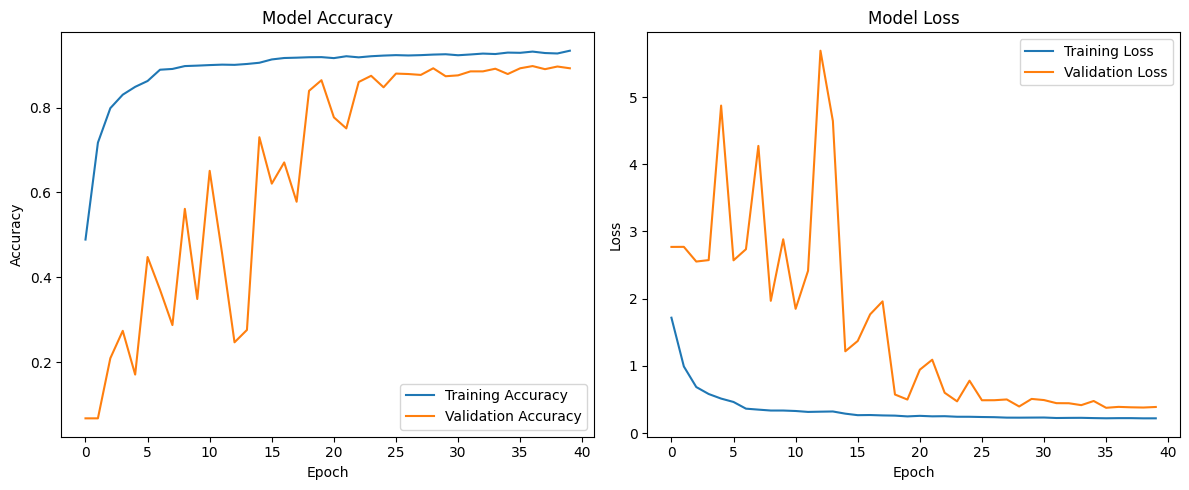

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [22]:
test_loss, test_acc = model3.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.9062 - loss: 0.3337
Test Accuracy: 0.9025


In [23]:
from google.colab import drive
import os

drive.mount('/content/drive')

model_dir = '/content/drive/MyDrive/brain_tumor_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_name = 'Atrous_Convolution_v4.h5'

model3.save(os.path.join(model_dir, model_name))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


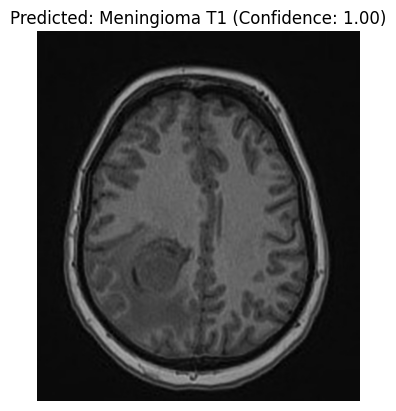

In [24]:

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path, target_size=(224, 224)):

    img = load_img(image_path, target_size=target_size)
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match model input (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (VGG16 specific)
    img_array = img_array / 255.0  # Normalizing the image
    return img_array

def predict_image(image_path, model, class_names):
    img_array = load_and_preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_prob = np.max(predictions)
    return class_names[predicted_class[0]], predicted_prob

def display_prediction(image_path, predicted_class, predicted_prob):
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} (Confidence: {predicted_prob:.2f})")
    plt.show()

image_path = '/content/drive/MyDrive/Brain_Tumor_44/Meningioma T1/0e7717a596ec7797ebea9a74c282960e67237f41ed71dd6528f4add050bb225d_big_gallery.jpeg'
class_names = ['Astrocitoma T1', 'Carcinoma T1', 'Ependimoma T1', 'Ganglioglioma T1', 'Germinoma T1',
               'Glioblastoma T1', 'Granuloma T1', 'Meduloblastoma T1', 'Meningioma T1', 'Neurocitoma T1',
               'Oligodendroglioma T1', 'Papiloma T1', 'Schwannoma T1', 'Tuberculoma T1', '_NORMAL T1']

predicted_class, predicted_prob = predict_image(image_path, model3, class_names)
display_prediction(image_path, predicted_class, predicted_prob)

In [31]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input, Dropout, concatenate, add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Best hyperparameters found
best_layers = [512, 256, 128]
best_batch_size = 64
best_learning_rate = 0.001

def atrous_bottleneck_block(x, filters, dilation_rate):
    shortcut = x  # Skip connection

    # First layer
    x = Conv2D(filters // 4, (1, 1), padding='same', activation='relu')(x)

    # Atrous convolution
    x = Conv2D(filters // 4, (3, 3), dilation_rate=dilation_rate, padding='same', activation='relu')(x)

    # Third layer
    x = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)

    # Adjust the shortcut to match the shape of x (if necessary)
    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same', activation='relu')(shortcut)

    # Add skip connection
    x = add([shortcut, x])
    return x


def create_vgg16_with_atrous_and_aspp():
    input_layer = Input(shape=(224, 224, 3))

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 3 - Atrous + Bottleneck Block
    x = Conv2D(512, (3, 3), dilation_rate=(2, 2), padding='same', activation='relu')(x)  # Atrous convolution
    x = atrous_bottleneck_block(x, 256, dilation_rate=(2, 2))
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 4 - Atrous + Hybrid Convolution
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)  # Standard convolution
    x = Conv2D(512, (3, 3), dilation_rate=(3, 3), padding='same', activation='relu')(x)  # Atrous convolution
    x = Conv2D(512, (3, 3), dilation_rate=(4, 4), padding='same', activation='relu')(x)  # Atrous convolution
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Block 5 - Atrous Spatial Pyramid Pooling (ASPP)
    atrous_1 = Conv2D(256, (3, 3), dilation_rate=(1, 1), padding='same', activation='relu')(x)
    atrous_2 = Conv2D(256, (3, 3), dilation_rate=(2, 2), padding='same', activation='relu')(x)
    atrous_3 = Conv2D(256, (3, 3), dilation_rate=(3, 3), padding='same', activation='relu')(x)
    atrous_4 = Conv2D(256, (3, 3), dilation_rate=(4, 4), padding='same', activation='relu')(x)

    # Concatenate the ASPP outputs
    x = concatenate([atrous_1, atrous_2, atrous_3, atrous_4])


    # Final Max Pooling
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten the output
    x = Flatten()(x)

    # Fully connected layers
    for nodes in best_layers:
        x = Dense(nodes, activation='relu')(x)
        x = BatchNormalization()(x)

    # Output layer for classification
    predictions = Dense(15, activation='softmax')(x)

    model4 = Model(inputs=input_layer, outputs=predictions)

    # Compile the model
    model4.compile(optimizer=Adam(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model4

model4 = create_vgg16_with_atrous_and_aspp()

model4.summary()

early_stopping = EarlyStopping(monitor='val_accuracy', patience=9, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Start time
start_time = time.time()

# Train the model
history = model4.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=best_batch_size,
    callbacks=[early_stopping, reduce_lr]
)

# End time
end_time = time.time()
training_time = end_time - start_time

print(f"Training Time: {training_time:.2f} seconds")

# Print final training and validation accuracies
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 224, 224, 64)   │          1,792 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 224, 224, 64)   │         36,928 │ conv2d_55[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_19          │ (None, 112, 112, 64)   │              0 │ conv2d_56[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 112, 112, 128)  │         73,856 │ max_pooling2d_19[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 112, 112, 128)  │        147,584 │ conv2d_57[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_20          │ (None, 56, 56, 128)    │              0 │ conv2d_58[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 56, 56, 512)    │        590,336 │ max_pooling2d_20[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 56, 56, 64)     │         32,832 │ conv2d_59[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ conv2d_60[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 56, 56, 256)    │        131,328 │ conv2d_59[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 56, 56, 256)    │         16,640 │ conv2d_61[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 56, 56, 256)    │              0 │ conv2d_63[0][0],       │
│                           │                        │                │ conv2d_62[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_21          │ (None, 28, 28, 256)    │              0 │ add_2[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 28, 28, 512)    │      1,180,160 │ max_pooling2d_21[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_65 (Conv2D)        │ (None, 28, 28, 512)    │      2,359,808 │ conv2d_64[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_66 (Conv2D)        │ (None, 28, 28, 512)    │      2,359,808 │ conv2d_65[0][0]        │
├──────────────────────

 Total params: 37,547,983 (143.23 MB)

 Trainable params: 37,546,191 (143.23 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 137s 597ms/step - accuracy: 0.2089 - loss: 2.6098 - val_accuracy: 0.1458 - val_loss: 2.7161 - learning_rate: 0.0010
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 542ms/step - accuracy: 0.3561 - loss: 2.0181 - val_accuracy: 0.1292 - val_loss: 4.0681 - learning_rate: 0.0010
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 542ms/step - accuracy: 0.4558 - loss: 1.7251 - val_accuracy: 0.0698 - val_loss: 7.7560 - learning_rate: 0.0010
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 543ms/step - accuracy: 0.5823 - loss: 1.3582 - val_accuracy: 0.1813 - val_loss: 3.6168 - learning_rate: 0.0010
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 545ms/step - accuracy: 0.6934 - loss: 1.0365 - val_accuracy: 0.2635 - val_loss: 2.8720 - learning_rate: 5.0000e-04
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 542ms/step - accuracy: 0.7453 - loss: 0.8419 - val_accuracy: 0.1406 - val_loss: 5.5075 - learning_rate: 5.0000e-04
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 544ms/step - accu

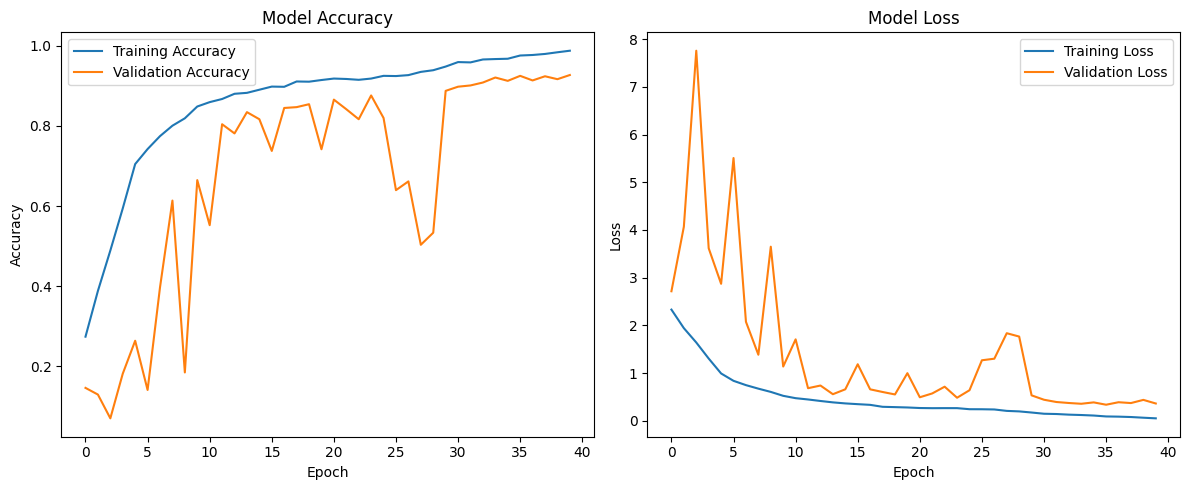

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [34]:
test_loss, test_acc = model4.evaluate(test_generator)

print(f"Test Accuracy: {test_acc:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9381 - loss: 1.4817
Test Accuracy: 0.9383


In [35]:
from google.colab import drive
import os

drive.mount('/content/drive')

model_dir = '/content/drive/MyDrive/brain_tumor_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_name = 'Atrous_Convolution_v5.h5'

model4.save(os.path.join(model_dir, model_name))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


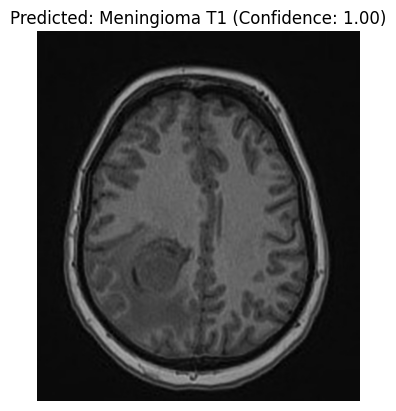

In [36]:

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path, target_size=(224, 224)):

    img = load_img(image_path, target_size=target_size)
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Expand dimensions to match model input (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (VGG16 specific)
    img_array = img_array / 255.0  # Normalizing the image
    return img_array

def predict_image(image_path, model, class_names):
    img_array = load_and_preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_prob = np.max(predictions)
    return class_names[predicted_class[0]], predicted_prob

def display_prediction(image_path, predicted_class, predicted_prob):
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} (Confidence: {predicted_prob:.2f})")
    plt.show()

image_path = '/content/drive/MyDrive/Brain_Tumor_44/Meningioma T1/0e7717a596ec7797ebea9a74c282960e67237f41ed71dd6528f4add050bb225d_big_gallery.jpeg'
class_names = ['Astrocitoma T1', 'Carcinoma T1', 'Ependimoma T1', 'Ganglioglioma T1', 'Germinoma T1',
               'Glioblastoma T1', 'Granuloma T1', 'Meduloblastoma T1', 'Meningioma T1', 'Neurocitoma T1',
               'Oligodendroglioma T1', 'Papiloma T1', 'Schwannoma T1', 'Tuberculoma T1', '_NORMAL T1']

predicted_class, predicted_prob = predict_image(image_path, model4, class_names)
display_prediction(image_path, predicted_class, predicted_prob)